<a href="https://colab.research.google.com/github/rendrasatriar/Density-SILO/blob/Belambus_Selatan/Belambus_Selatan_BRK_SPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [ ]:
!pip install --quiet google-cloud-bigquery pandas pyarrow

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.cloud import bigquery
import pandas as pd

PROJECT_ID = "study-density-silo"
DATASET_ID = "study_density"
TABLE_ID = "raw_data_belambus_selatan"

client = bigquery.Client(project=PROJECT_ID)

def fetch_single_block(project: str, dataset: str, table_id: str, max_rows: int = None) -> pd.DataFrame:
    table_full = f"{project}.{dataset}.{table_id}"
    query = f"SELECT * FROM `{table_full}`"
    job = client.query(query)
    if max_rows:
        return job.result(max_results=max_rows).to_dataframe()
    return job.to_dataframe()

In [ ]:
# --- Ambil data satu blok ---
df_block = fetch_single_block(PROJECT_ID, DATASET_ID, TABLE_ID)
print(f"Loaded table: {PROJECT_ID}.{DATASET_ID}.{TABLE_ID}")
print("Rows:", len(df_block))
print("Columns:", len(df_block.columns))
print("Shape:", df_block.shape)
print("-" * 60)

# --- Informasi kolom dan tipe data ---
print("\nColumn info:")
print(df_block.dtypes)
print("\nMemory usage (MB):")
print(df_block.memory_usage(deep=True).sum() / 1024**2)

# --- Statistik numerik singkat ---
print("\nDescriptive statistics (numeric columns):")
display(df_block.describe().transpose())

# --- Distribusi kategori penting ---
if 'GEN_LYR' in df_block.columns:
    print("\nUnique GEN_LYR count:", df_block['GEN_LYR'].nunique())
    print("Top GEN_LYR value counts:")
    display(df_block['GEN_LYR'].value_counts().head(20))

if 'Material' in df_block.columns:
    print("\nUnique Material count:", df_block['Material'].nunique())
    print("Top Material value counts:")
    display(df_block['Material'].value_counts().head(20))

# --- Quick QAQC checks ---
print("\nQAQC checks:")
if {'Interval','From','To'}.issubset(df_block.columns):
    n_bad_interval = len(df_block[(df_block['Interval'] <= 0) | (df_block['To'] <= df_block['From'])])
    print("Rows with Interval <= 0 or To <= From:", n_bad_interval)
else:
    print("Columns Interval/From/To not all present for QAQC checks.")

Loaded table: study-density-silo.study_density.raw_data_belambus_selatan
Rows: 855
Columns: 16
Shape: (855, 16)
------------------------------------------------------------

Column info:
HoleId         object
Hill           object
Hill_Group     object
From          float64
To            float64
Interval      float64
CoreRec       float64
WetW          float64
H2O           float64
DryW          float64
Material       object
Layer          object
NEW_LYR        object
GEN_LYR        object
WTF           float64
DTF           float64
dtype: object

Memory usage (MB):
0.37732601165771484

Descriptive statistics (numeric columns):


,count,mean,std,min,25%,50%,75%,max
From,855.0,5.922185,3.674509,0.000000,3.000000,6.000000,8.675000,17.000000
To,855.0,6.635050,3.670369,0.300000,3.740000,6.400000,9.000000,18.000000
Interval,855.0,0.712865,0.294277,0.120000,0.450000,0.700000,1.000000,1.500000
CoreRec,855.0,0.991234,0.124041,0.260000,1.000000,1.000000,1.000000,3.100000
WetW,855.0,3.850371,1.839270,0.400000,2.295000,3.820000,5.206500,10.265000
H2O,855.0,23.257950,15.081707,0.639000,10.320500,22.187000,34.205500,65.541000
DryW,855.0,3.015953,1.621328,0.245000,1.620000,2.910000,4.309000,8.515000
WTF,855.0,1.869734,0.466007,0.722426,1.581269,1.811992,2.092399,4.652560
DTF,855.0,1.436012,0.438915,0.318491,1.131333,1.440388,1.737027,3.169096



Unique GEN_LYR count: 5
Top GEN_LYR value counts:


,count
GEN_LYR,
LIM,469
SAP,165
BRK,163
SAPX,46
LIMX,12



Unique Material count: 22
Top Material value counts:


,count
Material,
YLIM,189
Lim,128
SAP,89
ESAP,85
RLIM,80
BR,44
SPT,36
HGT,35
HSAP,30



QAQC checks:
Rows with Interval <= 0 or To <= From: 0


# Filter By GEN_LYR dan Material

In [171]:

gen_lyr_input = input("Masukkan GEN_LYR yang ingin difilter: ").strip()
material_input = input("Masukkan Material yang ingin difilter: ").strip()

df_filtered = df_block.copy()

if 'GEN_LYR' in df_filtered.columns:
    df_filtered = df_filtered[df_filtered['GEN_LYR'].str.upper() == gen_lyr_input.upper()]

if 'Material' in df_filtered.columns:
    df_filtered = df_filtered[df_filtered['Material'].str.upper() == material_input.upper()]

print(f"\nFiltered rows: {len(df_filtered)}")
display(df_filtered.head(133))

Masukkan GEN_LYR yang ingin difilter: BRK
Masukkan Material yang ingin difilter: SPT

Filtered rows: 30


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
28,CS8170214,BATU BERANI,Belambus_Selatan,10.00,11.00,1.00,1.00,5.198,6.233,4.874,SPT,None,BRKS,BRK,1.777919,1.667098
29,CS8170214,BATU BERANI,Belambus_Selatan,11.00,12.00,1.00,1.00,5.038,5.478,4.762,SPT,None,BRKS,BRK,1.723193,1.628790
30,CS8170214,BATU BERANI,Belambus_Selatan,9.00,10.00,1.00,0.90,5.100,6.209,4.783,SPT,None,BRKS,BRK,1.938221,1.817874
49,CS8170215,BATU BERANI,Belambus_Selatan,7.80,8.05,0.25,1.00,1.921,6.143,1.803,SPT,None,BRK,BRK,2.628228,2.466786
50,CS8170215,BATU BERANI,Belambus_Selatan,8.05,8.65,0.60,1.00,3.153,16.048,2.647,SPT,None,BRK,BRK,1.797415,1.508962
89,CS8170220,BATU BERANI,Belambus_Selatan,14.00,15.00,1.00,1.00,5.610,10.713,5.009,SPT,None,BRKS,BRK,1.918839,1.713274
90,CS8170220,BATU BERANI,Belambus_Selatan,17.00,18.00,1.00,1.00,5.171,4.177,4.955,SPT,None,BRKS,BRK,1.768684,1.694803
91,CS8170220,BATU BERANI,Belambus_Selatan,15.00,16.00,1.00,1.00,6.183,10.642,5.525,SPT,None,BRKS,BRK,2.114827,1.889766
92,CS8170220,BATU BERANI,Belambus_Selatan,16.00,17.00,1.00,0.95,5.541,8.121,5.091,SPT,None,BRKS,BRK,1.994988,1.832969
93,CS8170220,BATU BERANI,Belambus_Selatan,13.50,14.00,0.50,1.00,3.147,12.456,2.755,SPT,None,BRKS,BRK,2.152794,1.884635


# Filter By Interval

Descriptive statistics for Interval:
Count: 30
Mean: 0.918333
Standard Error: 0.038840
Median: 1.0
Mode: 1.0
Standard Deviation: 0.212734
Sample Variance: 0.045256
Kurtosis: 2.382296
Skewness: -1.876092
Range: 0.95
Minimum: 0.25
Maximum: 1.2
Sum: 27.549999999999997
Confidence Level (95%): ±0.079436

Bin calculation:
Freedman–Diaconis -> bins: 5, bin width: N/A
Sturges -> bins: 6, bin width: 0.158333


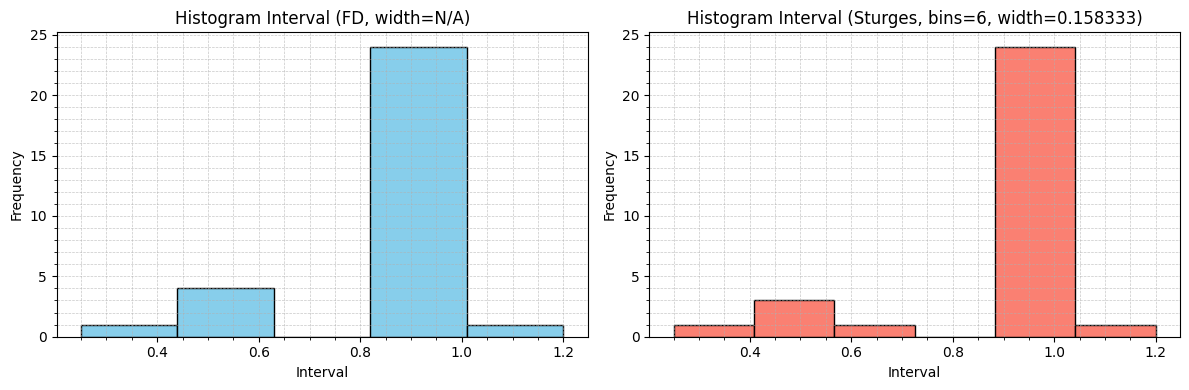


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.25,0.44,1
1,0.44,0.63,4
2,0.63,0.82,0
3,0.82,1.01,24
4,1.01,1.20,1



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.250000,0.408333,1
1,0.408333,0.566667,3
2,0.566667,0.725000,1
3,0.725000,0.883333,0
4,0.883333,1.041667,24
5,1.041667,1.200000,1


In [176]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import AutoMinorLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return int(np.sqrt(n)), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series):
    data = series.dropna().values
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    se = stats.sem(data)
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0] if n > 0 else None
    var = np.var(data, ddof=1)
    kurt = stats.kurtosis(data)
    skew = stats.skew(data)
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else None

    print("Descriptive statistics for Interval:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}")
    print(f"Sample Variance: {var:.6f}")
    print(f"Kurtosis: {kurt:.6f}")
    print(f"Skewness: {skew:.6f}")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): \u00b1{conf95:.6f}")

def plot_interval_histograms(df_filtered):
    if 'Interval' not in df_filtered.columns:
        print("Kolom 'Interval' tidak ada di dataframe.")
        return

    data = df_filtered['Interval'].dropna()

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data)

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins: {bins_fd}, bin width: {width_fd_str}")
    print(f"Sturges -> bins: {bins_st}, bin width: {width_st_str}")

    # --- plot histogram dengan minor ticks ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis pakai edges manual agar width konsisten
    if h_fd is not None and h_fd > 0:
        edges_fd = np.arange(data.min(), data.max() + h_fd, h_fd)
    else:
        edges_fd = np.linspace(data.min(), data.max(), bins_fd+1)

    counts_fd, edges_fd, _ = axes[0].hist(data, bins=edges_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram Interval (FD, width={width_fd_str})")
    axes[0].set_xlabel("Interval")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(AutoMinorLocator())
    axes[0].yaxis.set_minor_locator(AutoMinorLocator())
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges pakai jumlah bin
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram Interval (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("Interval")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(AutoMinorLocator())
    axes[1].yaxis.set_minor_locator(AutoMinorLocator())
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
interval_data = plot_interval_histograms(df_filtered) # Corrected function call

In [177]:
# Pastikan df_filtered sudah ada
# Contoh: df_filtered = filter_data(df_block, "LIM", "RLIM")

# Minta input dari user
lower_bound = float(input("Masukkan batas bawah (is greater than or equal to): "))
upper_bound = float(input("Masukkan batas atas (is less than or equal to): "))

# Filter data sesuai input
df_interval = df_filtered[(df_filtered['Interval'] >= lower_bound) &
                       (df_filtered['Interval'] <= upper_bound)]

print(f"\nFiltered rows: {len(df_interval)}")
display(df_interval.head(50))

Masukkan batas bawah (is greater than or equal to): 0.883333
Masukkan batas atas (is less than or equal to): 1.041667

Filtered rows: 24


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
28,CS8170214,BATU BERANI,Belambus_Selatan,10.0,11.0,1.0,1.00,5.198,6.233,4.874,SPT,None,BRKS,BRK,1.777919,1.667098
29,CS8170214,BATU BERANI,Belambus_Selatan,11.0,12.0,1.0,1.00,5.038,5.478,4.762,SPT,None,BRKS,BRK,1.723193,1.628790
30,CS8170214,BATU BERANI,Belambus_Selatan,9.0,10.0,1.0,0.90,5.100,6.209,4.783,SPT,None,BRKS,BRK,1.938221,1.817874
89,CS8170220,BATU BERANI,Belambus_Selatan,14.0,15.0,1.0,1.00,5.610,10.713,5.009,SPT,None,BRKS,BRK,1.918839,1.713274
90,CS8170220,BATU BERANI,Belambus_Selatan,17.0,18.0,1.0,1.00,5.171,4.177,4.955,SPT,None,BRKS,BRK,1.768684,1.694803
91,CS8170220,BATU BERANI,Belambus_Selatan,15.0,16.0,1.0,1.00,6.183,10.642,5.525,SPT,None,BRKS,BRK,2.114827,1.889766
92,CS8170220,BATU BERANI,Belambus_Selatan,16.0,17.0,1.0,0.95,5.541,8.121,5.091,SPT,None,BRKS,BRK,1.994988,1.832969
132,CS8170222,BATU BERANI,Belambus_Selatan,9.0,10.0,1.0,1.00,5.605,6.566,5.237,SPT,None,BRK,BRK,1.917129,1.791258
162,CS8230796,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.0,8.0,1.0,1.00,4.940,5.466,4.670,SPT,BR,BRK,BRK,1.684147,1.592098
164,CS8230796,Belambus Blok 1 Spasi 100,Belambus_Selatan,8.0,9.0,1.0,0.90,4.005,3.246,3.875,SPT,BR,BRK,BRK,1.517096,1.467852


# Filter By Recovery


Descriptive statistics for CoreRec:
Count: 24
Mean: 0.977083
Standard Error: 0.008501
Median: 1.0
Mode: 1.0
Standard Deviation: 0.041649
Sample Variance: 0.001735
Kurtosis: -0.255275
Skewness: -1.286913
Range: 0.09999999999999998
Minimum: 0.9
Maximum: 1.0
Sum: 23.45
Confidence Level (95%): ±0.017587

Bin calculation:
Freedman–Diaconis -> bins=12, width=0.008667
Sturges -> bins=6, width=0.016667


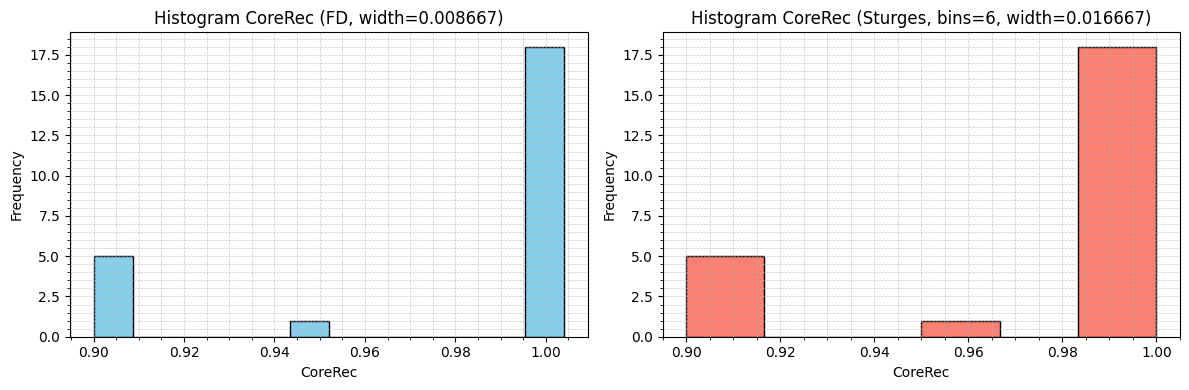


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.900000,0.908667,5
1,0.908667,0.917334,0
2,0.917334,0.926001,0
3,0.926001,0.934668,0
4,0.934668,0.943335,0
5,0.943335,0.952002,1
6,0.952002,0.960669,0
7,0.960669,0.969336,0
8,0.969336,0.978003,0
9,0.978003,0.986670,0



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.900000,0.916667,5
1,0.916667,0.933333,0
2,0.933333,0.950000,0
3,0.950000,0.966667,1
4,0.966667,0.983333,0
5,0.983333,1.000000,18


In [178]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import AutoMinorLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="CoreRec"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_coreRec(df_interval):
    if 'CoreRec' not in df_interval.columns:
        print("Kolom 'CoreRec' tidak ada di dataframe.")
        return

    data = df_interval['CoreRec'].dropna()
    if data.empty:
        print("Tidak ada data 'CoreRec' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="CoreRec")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis pakai edges manual agar width konsisten
    if h_fd is not None and h_fd > 0:
        edges_fd = np.arange(data.min(), data.max() + h_fd, h_fd)
    else:
        edges_fd = np.linspace(data.min(), data.max(), bins_fd+1)

    counts_fd, edges_fd, _ = axes[0].hist(data, bins=edges_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram CoreRec (FD, width={width_fd_str})")
    axes[0].set_xlabel("CoreRec")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(AutoMinorLocator())
    axes[0].yaxis.set_minor_locator(AutoMinorLocator())
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges pakai jumlah bin
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram CoreRec (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("CoreRec")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(AutoMinorLocator())
    axes[1].yaxis.set_minor_locator(AutoMinorLocator())
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
coreRec_data = analyze_coreRec(df_interval)

In [179]:
lower_bound = float(input("Masukkan batas bawah (is greater than or equal to): "))
upper_bound = float(input("Masukkan batas atas (is less than or equal to): "))


df_recovery = df_interval[(df_interval['CoreRec'] >= lower_bound) &
                       (df_interval['CoreRec'] <= upper_bound)]

print(f"\nFiltered rows: {len(df_recovery)}")
display(df_recovery.head(47))

Masukkan batas bawah (is greater than or equal to): 0.983333
Masukkan batas atas (is less than or equal to): 1.000000

Filtered rows: 18


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
28,CS8170214,BATU BERANI,Belambus_Selatan,10.0,11.0,1.0,1.0,5.198,6.233,4.874,SPT,None,BRKS,BRK,1.777919,1.667098
29,CS8170214,BATU BERANI,Belambus_Selatan,11.0,12.0,1.0,1.0,5.038,5.478,4.762,SPT,None,BRKS,BRK,1.723193,1.628790
89,CS8170220,BATU BERANI,Belambus_Selatan,14.0,15.0,1.0,1.0,5.610,10.713,5.009,SPT,None,BRKS,BRK,1.918839,1.713274
90,CS8170220,BATU BERANI,Belambus_Selatan,17.0,18.0,1.0,1.0,5.171,4.177,4.955,SPT,None,BRKS,BRK,1.768684,1.694803
91,CS8170220,BATU BERANI,Belambus_Selatan,15.0,16.0,1.0,1.0,6.183,10.642,5.525,SPT,None,BRKS,BRK,2.114827,1.889766
132,CS8170222,BATU BERANI,Belambus_Selatan,9.0,10.0,1.0,1.0,5.605,6.566,5.237,SPT,None,BRK,BRK,1.917129,1.791258
162,CS8230796,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.0,8.0,1.0,1.0,4.940,5.466,4.670,SPT,BR,BRK,BRK,1.684147,1.592098
172,CS8230797,Belambus Blok 1 Spasi 100,Belambus_Selatan,9.0,10.0,1.0,1.0,4.290,11.422,3.800,SPT,BR,BRK,BRK,1.462548,1.295497
173,CS8230797,Belambus Blok 1 Spasi 100,Belambus_Selatan,8.0,9.0,1.0,1.0,4.250,16.000,3.570,SPT,BR,BRK,BRK,1.448912,1.217086
174,CS8230797,Belambus Blok 1 Spasi 100,Belambus_Selatan,10.0,11.0,1.0,1.0,4.890,7.362,4.530,SPT,BR,BRK,BRK,1.667101,1.544369


# Filter By Wet Weight


Residual IQR acuan:
Q1: -0.464, Q3: 0.255, IQR: 0.719
Lower margin: -1.542, Upper margin: 1.332


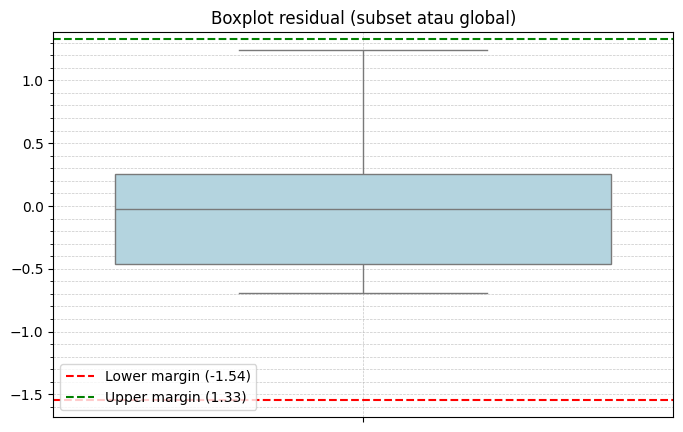

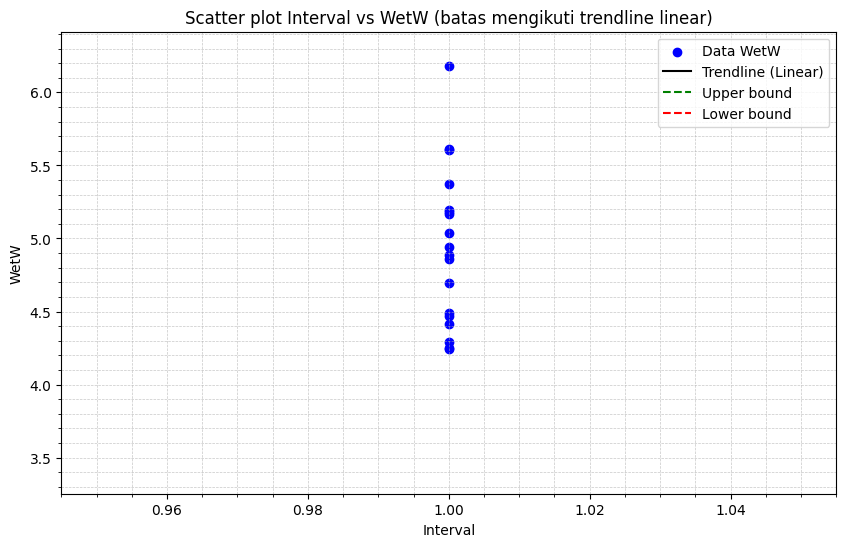


Outlier WetW berdasarkan trendline linear + IQR residual acuan:
Empty DataFrame
Columns: [HoleId, Hill, Hill_Group, From, To, Interval, CoreRec, WetW, H2O, DryW, Material, Layer, NEW_LYR, GEN_LYR, WTF, DTF]
Index: []


In [180]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from sklearn.linear_model import LinearRegression

def detect_outliers_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00):
    # --- Filter subset sesuai kriteria ---
    subset = df_recovery[(df_recovery['Interval'] == interval_value) &
                         (df_recovery['CoreRec'] == coreRec_value)]

    # --- Fit trendline linear (Interval vs WetW) ---
    X = df_recovery['Interval'].values.reshape(-1,1)
    y = df_recovery['WetW'].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    # --- Tentukan subset untuk residual ---
    if subset.empty:
        print(f"Tidak ada data dengan Interval={interval_value} dan CoreRec={coreRec_value}.")
        print("Menggunakan seluruh data sebagai acuan residual.")
        subset_X = X
        subset_y = y
    else:
        subset_X = subset['Interval'].values.reshape(-1,1)
        subset_y = subset['WetW'].values

    subset_pred = model.predict(subset_X)
    residuals = subset_y - subset_pred

    # --- Hitung IQR residual subset/global ---
    q1, q3 = np.percentile(residuals, [25, 75])
    iqr = q3 - q1
    lower_margin = q1 - 1.5 * iqr
    upper_margin = q3 + 1.5 * iqr

    print(f"\nResidual IQR acuan:")
    print(f"Q1: {q1:.3f}, Q3: {q3:.3f}, IQR: {iqr:.3f}")
    print(f"Lower margin: {lower_margin:.3f}, Upper margin: {upper_margin:.3f}")

    # --- Boxplot residual subset/global ---
    plt.figure(figsize=(8,5))
    sns.boxplot(y=residuals, color='lightblue')
    plt.axhline(lower_margin, color='red', linestyle='--', label=f'Lower margin ({lower_margin:.2f})')
    plt.axhline(upper_margin, color='green', linestyle='--', label=f'Upper margin ({upper_margin:.2f})')
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Boxplot residual (subset atau global)")
    plt.legend()
    plt.show()

    # --- Scatter plot seluruh data + trendline + batas mengikuti trendline ---
    plt.figure(figsize=(10,6))
    plt.scatter(df_recovery['Interval'], df_recovery['WetW'], color='blue', label='Data WetW')
    plt.plot(df_recovery['Interval'], y_pred, color='black', label='Trendline (Linear)')

    # Batas atas/bawah mengikuti trendline
    plt.plot(df_recovery['Interval'], y_pred + upper_margin, color='green', linestyle='--', label='Upper bound')
    plt.plot(df_recovery['Interval'], y_pred + lower_margin, color='red', linestyle='--', label='Lower bound')

    # Outlier = data di luar batas trendline ± margin
    outliers = df_recovery[(df_recovery['WetW'] > y_pred + upper_margin) |
                           (df_recovery['WetW'] < y_pred + lower_margin)]
    if not outliers.empty:
        plt.scatter(outliers['Interval'], outliers['WetW'], color='orange', label='Outliers')

    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Scatter plot Interval vs WetW (batas mengikuti trendline linear)")
    plt.xlabel("Interval")
    plt.ylabel("WetW")
    plt.legend()
    plt.show()

    return {
        "outliers": outliers,
        "margins": {"lower": lower_margin, "upper": upper_margin},
        "trendline_coef": {"slope": model.coef_[0], "intercept": model.intercept_}
    }

# --- Contoh pemanggilan ---
result = detect_outliers_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00)
if result:
    print("\nOutlier WetW berdasarkan trendline linear + IQR residual acuan:")
    print(result["outliers"].head())

## Normalisasi Weight terhadap recovery

In [181]:
import numpy as np
from IPython.display import display

def normalize_wetw(df_recovery):
    if 'WetW' not in df_recovery.columns or 'CoreRec' not in df_recovery.columns:
        print("Kolom 'WetW' atau 'CoreRec' tidak ada di dataframe.")
        return df_recovery

    # Buat kolom baru Normalized_WetW
    df_recovery['Normalized_WetW'] = np.where(
        df_recovery['CoreRec'] > 1.0,
        df_recovery['WetW'] / 1,          # jika CoreRec > 1.0
        df_recovery['WetW'] / df_recovery['CoreRec']  # jika CoreRec <= 1.0
    )

    print("\nNormalisasi WetW terhadap Recovery selesai.")
    # tampilkan seluruh dataframe dengan kolom tambahan
    display(df_recovery)

    return df_recovery

# --- Contoh pemanggilan ---
df_recovery = normalize_wetw(df_recovery)


Normalisasi WetW terhadap Recovery selesai.


/tmp/ipython-input-7809237.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recovery['Normalized_WetW'] = np.where(


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW
28,CS8170214,BATU BERANI,Belambus_Selatan,10.0,11.0,1.0,1.0,5.198,6.233,4.874,SPT,None,BRKS,BRK,1.777919,1.667098,5.198
29,CS8170214,BATU BERANI,Belambus_Selatan,11.0,12.0,1.0,1.0,5.038,5.478,4.762,SPT,None,BRKS,BRK,1.723193,1.628790,5.038
89,CS8170220,BATU BERANI,Belambus_Selatan,14.0,15.0,1.0,1.0,5.610,10.713,5.009,SPT,None,BRKS,BRK,1.918839,1.713274,5.610
90,CS8170220,BATU BERANI,Belambus_Selatan,17.0,18.0,1.0,1.0,5.171,4.177,4.955,SPT,None,BRKS,BRK,1.768684,1.694803,5.171
91,CS8170220,BATU BERANI,Belambus_Selatan,15.0,16.0,1.0,1.0,6.183,10.642,5.525,SPT,None,BRKS,BRK,2.114827,1.889766,6.183
132,CS8170222,BATU BERANI,Belambus_Selatan,9.0,10.0,1.0,1.0,5.605,6.566,5.237,SPT,None,BRK,BRK,1.917129,1.791258,5.605
162,CS8230796,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.0,8.0,1.0,1.0,4.940,5.466,4.670,SPT,BR,BRK,BRK,1.684147,1.592098,4.940
172,CS8230797,Belambus Blok 1 Spasi 100,Belambus_Selatan,9.0,10.0,1.0,1.0,4.290,11.422,3.800,SPT,BR,BRK,BRK,1.462548,1.295497,4.290
173,CS8230797,Belambus Blok 1 Spasi 100,Belambus_Selatan,8.0,9.0,1.0,1.0,4.250,16.000,3.570,SPT,BR,BRK,BRK,1.448912,1.217086,4.250
174,CS8230797,Belambus Blok 1 Spasi 100,Belambus_Selatan,10.0,11.0,1.0,1.0,4.890,7.362,4.530,SPT,BR,BRK,BRK,1.667101,1.544369,4.890



Residual IQR acuan:
Q1: -0.464, Q3: 0.255, IQR: 0.719
Lower margin: -1.542, Upper margin: 1.332


/tmp/ipython-input-1577443899.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recovery['Trendline_Pred'] = model.predict(df_recovery['Interval'].values.reshape(-1,1))
/tmp/ipython-input-1577443899.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recovery['Outlier_Status'] = [


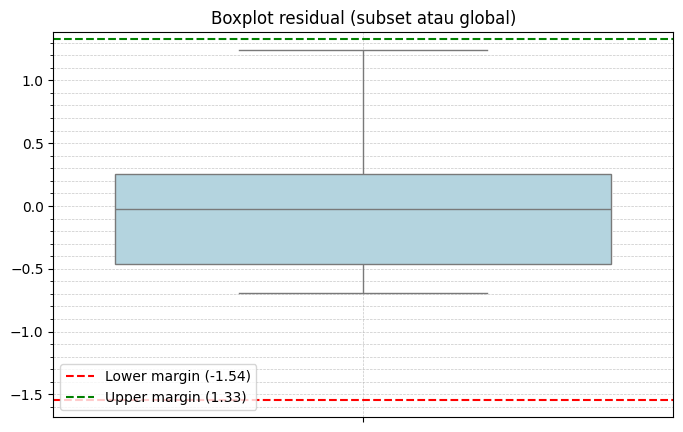

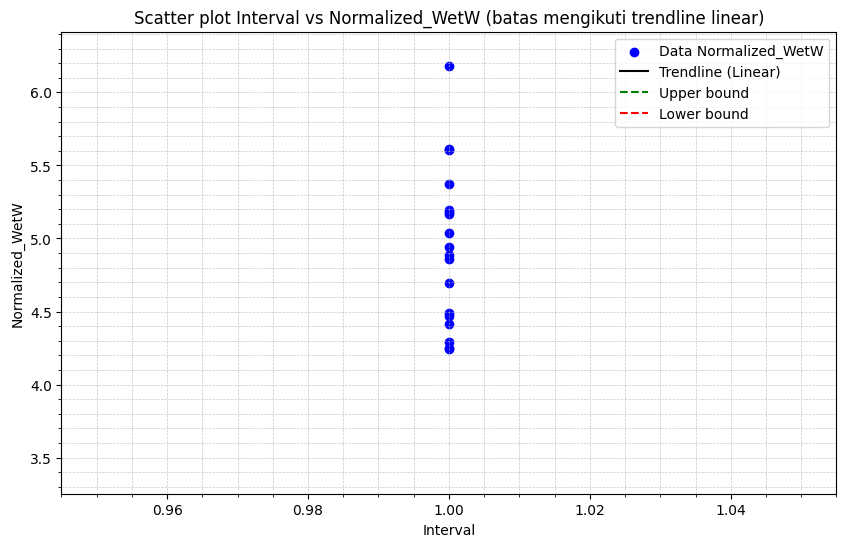

,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred,Outlier_Status
28,CS8170214,BATU BERANI,Belambus_Selatan,10.0,11.0,1.0,1.0,5.198,6.233,4.874,SPT,None,BRKS,BRK,1.777919,1.667098,5.198,4.938889,Normal
29,CS8170214,BATU BERANI,Belambus_Selatan,11.0,12.0,1.0,1.0,5.038,5.478,4.762,SPT,None,BRKS,BRK,1.723193,1.628790,5.038,4.938889,Normal
89,CS8170220,BATU BERANI,Belambus_Selatan,14.0,15.0,1.0,1.0,5.610,10.713,5.009,SPT,None,BRKS,BRK,1.918839,1.713274,5.610,4.938889,Normal
90,CS8170220,BATU BERANI,Belambus_Selatan,17.0,18.0,1.0,1.0,5.171,4.177,4.955,SPT,None,BRKS,BRK,1.768684,1.694803,5.171,4.938889,Normal
91,CS8170220,BATU BERANI,Belambus_Selatan,15.0,16.0,1.0,1.0,6.183,10.642,5.525,SPT,None,BRKS,BRK,2.114827,1.889766,6.183,4.938889,Normal
132,CS8170222,BATU BERANI,Belambus_Selatan,9.0,10.0,1.0,1.0,5.605,6.566,5.237,SPT,None,BRK,BRK,1.917129,1.791258,5.605,4.938889,Normal
162,CS8230796,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.0,8.0,1.0,1.0,4.940,5.466,4.670,SPT,BR,BRK,BRK,1.684147,1.592098,4.940,4.938889,Normal
172,CS8230797,Belambus Blok 1 Spasi 100,Belambus_Selatan,9.0,10.0,1.0,1.0,4.290,11.422,3.800,SPT,BR,BRK,BRK,1.462548,1.295497,4.290,4.938889,Normal
173,CS8230797,Belambus Blok 1 Spasi 100,Belambus_Selatan,8.0,9.0,1.0,1.0,4.250,16.000,3.570,SPT,BR,BRK,BRK,1.448912,1.217086,4.250,4.938889,Normal
174,CS8230797,Belambus Blok 1 Spasi 100,Belambus_Selatan,10.0,11.0,1.0,1.0,4.890,7.362,4.530,SPT,BR,BRK,BRK,1.667101,1.544369,4.890,4.938889,Normal


In [182]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from sklearn.linear_model import LinearRegression

def detect_outliers_normalized_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00):
    # --- Filter subset sesuai kriteria ---
    subset = df_recovery[(df_recovery['Interval'] == interval_value) &
                         (df_recovery['CoreRec'] == coreRec_value)]

    # --- Fit trendline linear (Interval vs Normalized_WetW) ---
    X = df_recovery['Interval'].values.reshape(-1,1)
    y = df_recovery['Normalized_WetW'].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    # --- Tentukan subset untuk residual ---
    if subset.empty:
        print(f"Tidak ada data dengan Interval={interval_value} dan CoreRec={coreRec_value}.")
        print("Menggunakan seluruh data sebagai acuan residual.")
        subset_X = X
        subset_y = y
    else:
        subset_X = subset['Interval'].values.reshape(-1,1)
        subset_y = subset['Normalized_WetW'].values

    subset_pred = model.predict(subset_X)
    residuals = subset_y - subset_pred

    # --- Hitung IQR residual subset/global ---
    q1, q3 = np.percentile(residuals, [25, 75])
    iqr = q3 - q1
    lower_margin = q1 - 1.5 * iqr
    upper_margin = q3 + 1.5 * iqr

    print(f"\nResidual IQR acuan:")
    print(f"Q1: {q1:.3f}, Q3: {q3:.3f}, IQR: {iqr:.3f}")
    print(f"Lower margin: {lower_margin:.3f}, Upper margin: {upper_margin:.3f}")

    # --- Tambahkan kolom status outlier ---
    def classify_outlier(val, pred):
        if val < pred + lower_margin:
            return "Outlier bawah"
        elif val > pred + upper_margin:
            return "Outlier atas"
        else:
            return "Normal"

    df_recovery['Trendline_Pred'] = model.predict(df_recovery['Interval'].values.reshape(-1,1))
    df_recovery['Outlier_Status'] = [
        classify_outlier(val, pred)
        for val, pred in zip(df_recovery['Normalized_WetW'], df_recovery['Trendline_Pred'])
    ]

    # --- Boxplot residual subset/global ---
    plt.figure(figsize=(8,5))
    sns.boxplot(y=residuals, color='lightblue')
    plt.axhline(lower_margin, color='red', linestyle='--', label=f'Lower margin ({lower_margin:.2f})')
    plt.axhline(upper_margin, color='green', linestyle='--', label=f'Upper margin ({upper_margin:.2f})')
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Boxplot residual (subset atau global)")
    plt.legend()
    plt.show()

    # --- Scatter plot seluruh data + trendline + batas mengikuti trendline ---
    plt.figure(figsize=(10,6))
    plt.scatter(df_recovery['Interval'], df_recovery['Normalized_WetW'], color='blue', label='Data Normalized_WetW')
    plt.plot(df_recovery['Interval'], df_recovery['Trendline_Pred'], color='black', label='Trendline (Linear)')

    # Batas atas/bawah mengikuti trendline
    plt.plot(df_recovery['Interval'], df_recovery['Trendline_Pred'] + upper_margin,
             color='green', linestyle='--', label='Upper bound')
    plt.plot(df_recovery['Interval'], df_recovery['Trendline_Pred'] + lower_margin,
             color='red', linestyle='--', label='Lower bound')

    # Outlier ditandai oranye
    outliers = df_recovery[df_recovery['Outlier_Status'] != "Normal"]
    if not outliers.empty:
        plt.scatter(outliers['Interval'], outliers['Normalized_WetW'], color='orange', label='Outliers')

    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Scatter plot Interval vs Normalized_WetW (batas mengikuti trendline linear)")
    plt.xlabel("Interval")
    plt.ylabel("Normalized_WetW")
    plt.legend()
    plt.show()

    return df_recovery

# --- Contoh pemanggilan ---
df_recovery = detect_outliers_normalized_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00)
display(df_recovery.head(15))


Bin calculation:
Freedman–Diaconis -> bins=5, width=0.548318
Sturges -> bins=6, width=0.323000


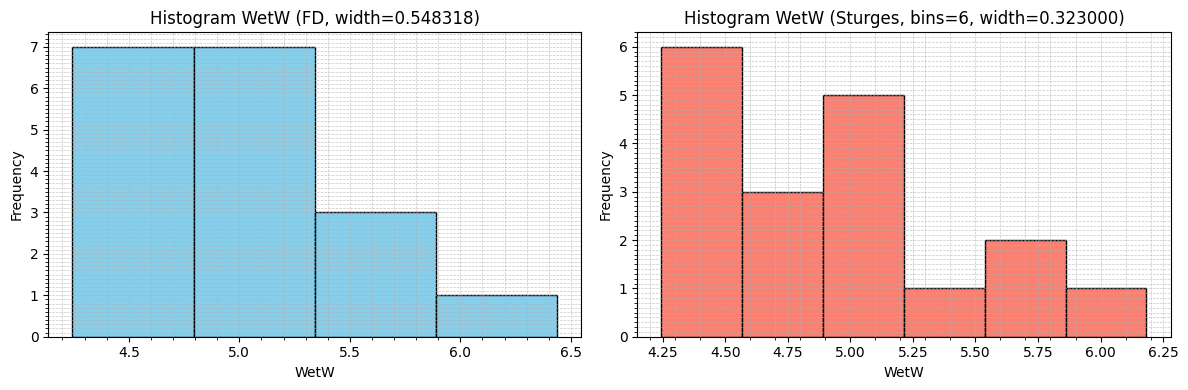


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,4.245000,4.793318,7
1,4.793318,5.341636,7
2,5.341636,5.889954,3
3,5.889954,6.438272,1



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,4.245,4.568,6
1,4.568,4.891,3
2,4.891,5.214,5
3,5.214,5.537,1
4,5.537,5.860,2
5,5.860,6.183,1


In [183]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def analyze_wetw(df_recovery):
    if 'WetW' not in df_recovery.columns:
        print("Kolom 'WetW' tidak ada di dataframe.")
        return

    data = df_recovery['WetW'].dropna()
    if data.empty:
        print("Tidak ada data 'WetW' yang valid setelah drop NaN.")
        return

    # --- hitung jumlah bins ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis pakai edges manual agar width konsisten
    if h_fd is not None and h_fd > 0:
        edges_fd = np.arange(data.min(), data.max() + h_fd, h_fd)
    else:
        edges_fd = np.linspace(data.min(), data.max(), bins_fd+1)

    counts_fd, edges_fd, _ = axes[0].hist(data, bins=edges_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram WetW (FD, width={width_fd_str})")
    axes[0].set_xlabel("WetW")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges pakai jumlah bin
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram WetW (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("WetW")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
wetw_data = analyze_wetw(df_recovery)

In [184]:
import numpy as np
from IPython.display import display

def filter_wetw_normal(df_recovery, lower_bound, upper_bound):
    """
    Filter data WetW berdasarkan batas bawah/atas,
    sekaligus memastikan hanya baris dengan Outlier_Status = 'Normal' yang lolos.
    Setelah selesai, kolom Outlier_Status dihapus.
    """
    # --- Filter berdasarkan WetW ---
    df_wetw = df_recovery[(df_recovery['WetW'] >= lower_bound) &
                          (df_recovery['WetW'] <= upper_bound)].copy()

    # --- Pastikan hanya baris Normal yang lolos ---
    if 'Outlier_Status' in df_wetw.columns:
        df_wetw = df_wetw[df_wetw['Outlier_Status'] == "Normal"].copy()
        # Drop kolom Outlier_Status setelah selesai
        df_wetw = df_wetw.drop(columns=['Outlier_Status'])
    else:
        print("Kolom Outlier_Status tidak ditemukan, hanya filter WetW yang diterapkan.")

    print(f"\nFiltered rows (Normal only): {len(df_wetw)}")
    display(df_wetw.head(10))

    return df_wetw

# --- Contoh pemanggilan ---
lower_bound = float(input("Masukkan batas bawah (>=): "))
upper_bound = float(input("Masukkan batas atas (<=): "))

df_wetw = filter_wetw_normal(df_recovery, lower_bound, upper_bound)

Masukkan batas bawah (>=): 4.245000
Masukkan batas atas (<=): 5.341636

Filtered rows (Normal only): 14


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred
28,CS8170214,BATU BERANI,Belambus_Selatan,10.0,11.0,1.0,1.0,5.198,6.233,4.874,SPT,None,BRKS,BRK,1.777919,1.667098,5.198,4.938889
29,CS8170214,BATU BERANI,Belambus_Selatan,11.0,12.0,1.0,1.0,5.038,5.478,4.762,SPT,None,BRKS,BRK,1.723193,1.628790,5.038,4.938889
90,CS8170220,BATU BERANI,Belambus_Selatan,17.0,18.0,1.0,1.0,5.171,4.177,4.955,SPT,None,BRKS,BRK,1.768684,1.694803,5.171,4.938889
162,CS8230796,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.0,8.0,1.0,1.0,4.940,5.466,4.670,SPT,BR,BRK,BRK,1.684147,1.592098,4.940,4.938889
172,CS8230797,Belambus Blok 1 Spasi 100,Belambus_Selatan,9.0,10.0,1.0,1.0,4.290,11.422,3.800,SPT,BR,BRK,BRK,1.462548,1.295497,4.290,4.938889
173,CS8230797,Belambus Blok 1 Spasi 100,Belambus_Selatan,8.0,9.0,1.0,1.0,4.250,16.000,3.570,SPT,BR,BRK,BRK,1.448912,1.217086,4.250,4.938889
174,CS8230797,Belambus Blok 1 Spasi 100,Belambus_Selatan,10.0,11.0,1.0,1.0,4.890,7.362,4.530,SPT,BR,BRK,BRK,1.667101,1.544369,4.890,4.938889
235,CS8230807,Belambus Blok 1 Spasi 100,Belambus_Selatan,10.0,11.0,1.0,1.0,4.860,9.156,4.415,SPT,BR,BRK,BRK,1.656873,1.505163,4.860,4.938889
418,CS8230823,Belambus Blok 1 Spasi 100,Belambus_Selatan,11.0,12.0,1.0,1.0,4.490,4.120,4.305,SPT,BR,BRK,BRK,1.530732,1.467662,4.490,4.938889
419,CS8230823,Belambus Blok 1 Spasi 100,Belambus_Selatan,12.0,13.0,1.0,1.0,5.180,3.185,5.015,SPT,BR,BRK,BRK,1.765967,1.709716,5.180,4.938889


#Filter By MC


Descriptive statistics for H2O:
Count: 14
Mean: 7.102929
Standard Error: 0.951207
Median: 6.1515
Mode: 3.132
Standard Deviation: 3.559091
Sample Variance: 12.667127
Kurtosis: 0.778733
Skewness: 1.104536
Range: 12.868
Minimum: 3.132
Maximum: 16.0
Sum: 99.44100000000002
Confidence Level (95%): ±2.054958

Bin calculation:
Freedman–Diaconis -> bins=5, width=3.650822
Sturges -> bins=5, width=2.573600


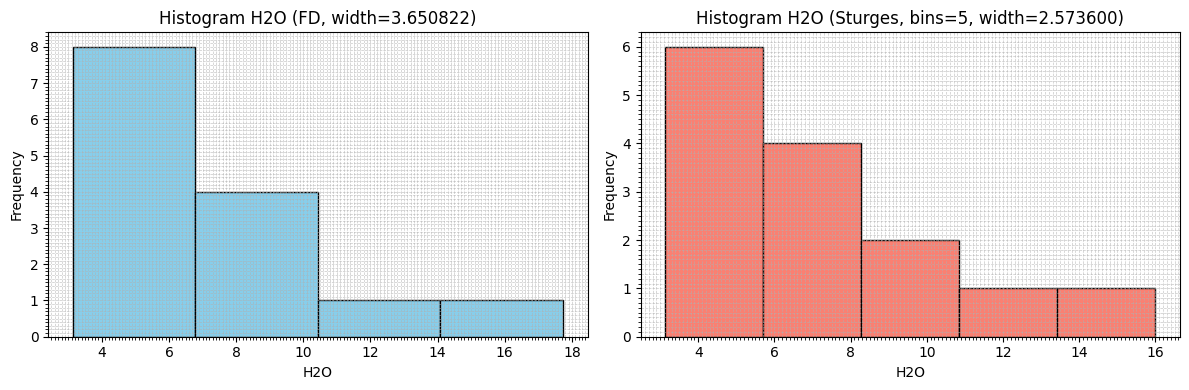


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,3.132000,6.782822,8
1,6.782822,10.433644,4
2,10.433644,14.084466,1
3,14.084466,17.735287,1



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,3.1320,5.7056,6
1,5.7056,8.2792,4
2,8.2792,10.8528,2
3,10.8528,13.4264,1
4,13.4264,16.0000,1


In [185]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="H2O"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_h2o(df_wetw):
    if 'H2O' not in df_wetw.columns:
        print("Kolom 'H2O' tidak ada di dataframe.")
        return

    data = df_wetw['H2O'].dropna()
    if data.empty:
        print("Tidak ada data 'H2O' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="H2O")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks interval 0.1 ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis pakai edges manual agar width konsisten
    if h_fd is not None and h_fd > 0:
        edges_fd = np.arange(data.min(), data.max() + h_fd, h_fd)
    else:
        edges_fd = np.linspace(data.min(), data.max(), bins_fd+1)

    counts_fd, edges_fd, _ = axes[0].hist(data, bins=edges_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram H2O (FD, width={width_fd_str})")
    axes[0].set_xlabel("H2O")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges pakai jumlah bin
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram H2O (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("H2O")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
h2o_data = analyze_h2o(df_wetw)

In [186]:

import numpy as np
from IPython.display import display

# Input batas bawah dan atas untuk H2O
lower_bound = float(input("is greater than or equal to: "))
upper_bound = float(input("is less than or equal to: "))

# Filter df_wetw berdasarkan H2O
df_h2o = df_wetw[(df_wetw['H2O'] >= lower_bound) &
                 (df_wetw['H2O'] <= upper_bound)].copy()

print(f"\nFiltered rows (H2O): {len(df_h2o)}")
display(df_h2o.head(10))

is greater than or equal to: 3.132000
is less than or equal to: 10.433644

Filtered rows (H2O): 12


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred
28,CS8170214,BATU BERANI,Belambus_Selatan,10.0,11.0,1.0,1.0,5.198,6.233,4.874,SPT,None,BRKS,BRK,1.777919,1.667098,5.198,4.938889
29,CS8170214,BATU BERANI,Belambus_Selatan,11.0,12.0,1.0,1.0,5.038,5.478,4.762,SPT,None,BRKS,BRK,1.723193,1.628790,5.038,4.938889
90,CS8170220,BATU BERANI,Belambus_Selatan,17.0,18.0,1.0,1.0,5.171,4.177,4.955,SPT,None,BRKS,BRK,1.768684,1.694803,5.171,4.938889
162,CS8230796,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.0,8.0,1.0,1.0,4.940,5.466,4.670,SPT,BR,BRK,BRK,1.684147,1.592098,4.940,4.938889
174,CS8230797,Belambus Blok 1 Spasi 100,Belambus_Selatan,10.0,11.0,1.0,1.0,4.890,7.362,4.530,SPT,BR,BRK,BRK,1.667101,1.544369,4.890,4.938889
235,CS8230807,Belambus Blok 1 Spasi 100,Belambus_Selatan,10.0,11.0,1.0,1.0,4.860,9.156,4.415,SPT,BR,BRK,BRK,1.656873,1.505163,4.860,4.938889
418,CS8230823,Belambus Blok 1 Spasi 100,Belambus_Selatan,11.0,12.0,1.0,1.0,4.490,4.120,4.305,SPT,BR,BRK,BRK,1.530732,1.467662,4.490,4.938889
419,CS8230823,Belambus Blok 1 Spasi 100,Belambus_Selatan,12.0,13.0,1.0,1.0,5.180,3.185,5.015,SPT,BR,BRK,BRK,1.765967,1.709716,5.180,4.938889
634,CS8230877R,Belambus Blok 1 Spasi 100,Belambus_Selatan,11.0,12.0,1.0,1.0,4.470,3.132,4.330,SPT,BR,BRK,BRK,1.523914,1.476185,4.470,4.938889
650,CS8230878,Belambus Blok 1 Spasi 100,Belambus_Selatan,13.0,14.0,1.0,1.0,4.695,6.070,4.410,SPT,BR,BRK,BRK,1.600621,1.503459,4.695,4.938889


# Filter By DTF


Descriptive statistics for DTF:
Count: 12
Mean: 1.540076
Standard Error: 0.035607
Median: 1.524766281
Mode: 1.329589378
Standard Deviation: 0.123346
Sample Variance: 0.015214
Kurtosis: -0.966035
Skewness: -0.214137
Range: 0.3801261949999999
Minimum: 1.329589378
Maximum: 1.709715573
Sum: 18.480910039
Confidence Level (95%): ±0.078370

Bin calculation:
Freedman–Diaconis -> bins=5, width=0.143540
Sturges -> bins=5, width=0.076025


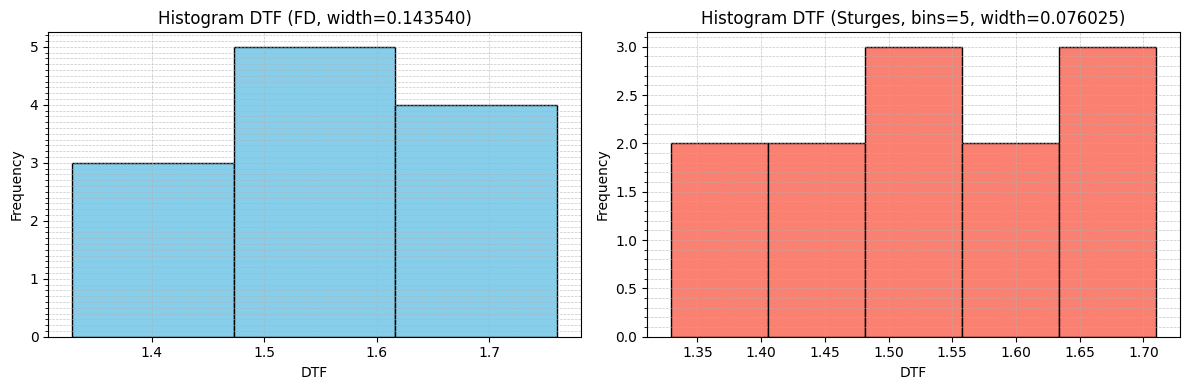


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,1.329589,1.47313,3
1,1.473130,1.61667,5
2,1.616670,1.76021,4



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,1.329589,1.405615,2
1,1.405615,1.481640,2
2,1.481640,1.557665,3
3,1.557665,1.633690,2
4,1.633690,1.709716,3


In [187]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="DTF"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_dtf(df_h2o):
    if 'DTF' not in df_h2o.columns:
        print("Kolom 'DTF' tidak ada di dataframe.")
        return

    data = df_h2o['DTF'].dropna()
    if data.empty:
        print("Tidak ada data 'DTF' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="DTF")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks interval 0.1 ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis pakai edges manual agar width konsisten
    if h_fd is not None and h_fd > 0:
        edges_fd = np.arange(data.min(), data.max() + h_fd, h_fd)
    else:
        edges_fd = np.linspace(data.min(), data.max(), bins_fd+1)

    counts_fd, edges_fd, _ = axes[0].hist(data, bins=edges_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram DTF (FD, width={width_fd_str})")
    axes[0].set_xlabel("DTF")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges pakai jumlah bin
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram DTF (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("DTF")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
dtf_data = analyze_dtf(df_h2o)

In [188]:
import numpy as np
from IPython.display import display

# Input batas bawah dan atas untuk H2O
lower_bound = float(input("is greater than or equal to: "))
upper_bound = float(input("is less than or equal to: "))

# Filter df_h2o berdasarkan DTF
df_dtf = df_h2o[(df_h2o['DTF'] >= lower_bound) &
                (df_h2o['DTF'] <= upper_bound)].copy()

print(f"\nFiltered rows (DTF): {len(df_dtf)}")
display(df_dtf.head(89))

is greater than or equal to: 1.329589
is less than or equal to: 1.709716

Filtered rows (DTF): 12


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred
28,CS8170214,BATU BERANI,Belambus_Selatan,10.0,11.0,1.0,1.0,5.198,6.233,4.874,SPT,None,BRKS,BRK,1.777919,1.667098,5.198,4.938889
29,CS8170214,BATU BERANI,Belambus_Selatan,11.0,12.0,1.0,1.0,5.038,5.478,4.762,SPT,None,BRKS,BRK,1.723193,1.628790,5.038,4.938889
90,CS8170220,BATU BERANI,Belambus_Selatan,17.0,18.0,1.0,1.0,5.171,4.177,4.955,SPT,None,BRKS,BRK,1.768684,1.694803,5.171,4.938889
162,CS8230796,Belambus Blok 1 Spasi 100,Belambus_Selatan,7.0,8.0,1.0,1.0,4.940,5.466,4.670,SPT,BR,BRK,BRK,1.684147,1.592098,4.940,4.938889
174,CS8230797,Belambus Blok 1 Spasi 100,Belambus_Selatan,10.0,11.0,1.0,1.0,4.890,7.362,4.530,SPT,BR,BRK,BRK,1.667101,1.544369,4.890,4.938889
235,CS8230807,Belambus Blok 1 Spasi 100,Belambus_Selatan,10.0,11.0,1.0,1.0,4.860,9.156,4.415,SPT,BR,BRK,BRK,1.656873,1.505163,4.860,4.938889
418,CS8230823,Belambus Blok 1 Spasi 100,Belambus_Selatan,11.0,12.0,1.0,1.0,4.490,4.120,4.305,SPT,BR,BRK,BRK,1.530732,1.467662,4.490,4.938889
419,CS8230823,Belambus Blok 1 Spasi 100,Belambus_Selatan,12.0,13.0,1.0,1.0,5.180,3.185,5.015,SPT,BR,BRK,BRK,1.765967,1.709716,5.180,4.938889
634,CS8230877R,Belambus Blok 1 Spasi 100,Belambus_Selatan,11.0,12.0,1.0,1.0,4.470,3.132,4.330,SPT,BR,BRK,BRK,1.523914,1.476185,4.470,4.938889
650,CS8230878,Belambus Blok 1 Spasi 100,Belambus_Selatan,13.0,14.0,1.0,1.0,4.695,6.070,4.410,SPT,BR,BRK,BRK,1.600621,1.503459,4.695,4.938889


# SUMMARY

In [189]:
import numpy as np
import scipy.stats as stats

def descriptive_stats(series, label):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

# --- Jalankan untuk semua kolom yang diminta ---
target_columns = ["Interval", "CoreRec", "WetW", "H2O", "DryW", "WTF", "DTF"]

for col in target_columns:
    if col in df_dtf.columns:
        descriptive_stats(df_dtf[col], label=col)
    else:
        print(f"\nKolom {col} tidak ditemukan di df_dtf.")


Descriptive statistics for Interval:
Count: 12
Mean: 1.000000
Standard Error: 0.000000
Median: 1.0
Mode: 1.0
Standard Deviation: 0.000000
Sample Variance: 0.000000
Kurtosis: N/A
Skewness: N/A
Range: 0.0
Minimum: 1.0
Maximum: 1.0
Sum: 12.0
Confidence Level (95%): ±0.000000

Descriptive statistics for CoreRec:
Count: 12
Mean: 1.000000
Standard Error: 0.000000
Median: 1.0
Mode: 1.0
Standard Deviation: 0.000000
Sample Variance: 0.000000
Kurtosis: N/A
Skewness: N/A
Range: 0.0
Minimum: 1.0
Maximum: 1.0
Sum: 12.0
Confidence Level (95%): ±0.000000

Descriptive statistics for WetW:
Count: 12
Mean: 4.799333
Standard Error: 0.095372
Median: 4.875
Mode: 4.245
Standard Deviation: 0.330380
Sample Variance: 0.109151
Kurtosis: -1.282397
Skewness: -0.280034
Range: 0.9530000000000003
Minimum: 4.245
Maximum: 5.198
Sum: 57.592
Confidence Level (95%): ±0.209913

Descriptive statistics for H2O:
Count: 12
Mean: 6.001583
Standard Error: 0.629483
Median: 5.774
Mode: 3.132
Standard Deviation: 2.180593
Sample V

/tmp/ipython-input-1308544473.py:17: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = stats.kurtosis(data) if n > 3 else np.nan
/tmp/ipython-input-1308544473.py:18: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(data) if n > 2 else np.nan


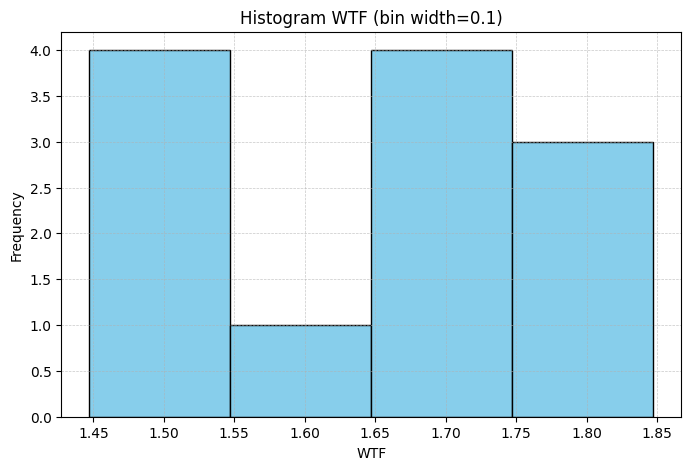


Tabel Histogram WTF:


,Bin Start,Bin End,Frequency
0,1.447207,1.547207,4
1,1.547207,1.647207,1
2,1.647207,1.747207,4
3,1.747207,1.847207,3


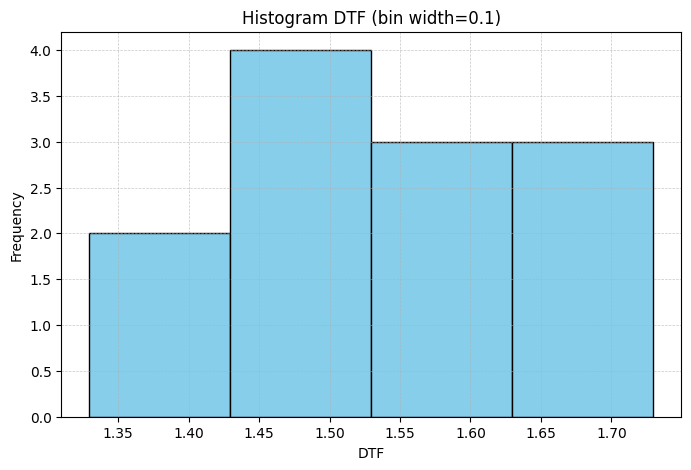


Tabel Histogram DTF:


,Bin Start,Bin End,Frequency
0,1.329589,1.429589,2
1,1.429589,1.529589,4
2,1.529589,1.629589,3
3,1.629589,1.729589,3


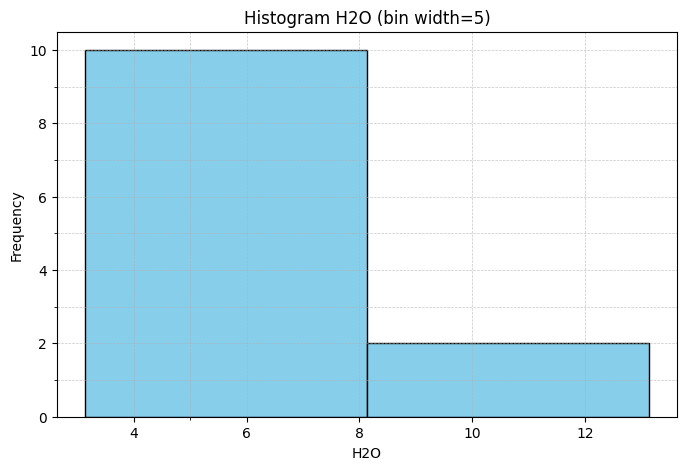


Tabel Histogram H2O:


,Bin Start,Bin End,Frequency
0,3.132,8.132,10
1,8.132,13.132,2


In [190]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MultipleLocator

def plot_histogram_fixed_width(series, bin_width, label):
    data = series.dropna().values
    if len(data) == 0:
        print(f"Tidak ada data untuk {label}.")
        return None

    # Tentukan bins berdasarkan bin_width
    min_val, max_val = data.min(), data.max()
    bins = np.arange(min_val, max_val + bin_width, bin_width)

    # Plot histogram
    plt.figure(figsize=(8,5))
    counts, edges, _ = plt.hist(data, bins=bins, color='skyblue', edgecolor='black')
    plt.title(f"Histogram {label} (bin width={bin_width})")
    plt.xlabel(label)
    plt.ylabel("Frequency")

    # Minor ticks sesuai bin width
    plt.gca().xaxis.set_minor_locator(MultipleLocator(bin_width))
    plt.gca().yaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.show()

    # Buat tabel histogram
    table = pd.DataFrame({
        "Bin Start": edges[:-1],
        "Bin End": edges[1:],
        "Frequency": counts.astype(int)
    })

    print(f"\nTabel Histogram {label}:")
    display(table)
    return table

# --- Contoh pemanggilan ---
table_wtf = plot_histogram_fixed_width(df_dtf['WTF'], bin_width=0.1, label="WTF")
table_dtf = plot_histogram_fixed_width(df_dtf['DTF'], bin_width=0.1, label="DTF")
table_h2o = plot_histogram_fixed_width(df_dtf['H2O'], bin_width=5, label="H2O")

In [191]:
import pandas as pd

# Input nama Block, GEN_LYR, dan Material
block_name = input("Masukkan nama Block: ")
gen_lyr = input("Masukkan GEN_LYR: ")
material = input("Masukkan Material: ")

# Hitung nilai ringkasan (contoh: mean)
summary = {
    "Block": block_name,
    "GEN_LYR": gen_lyr,
    "Material": material,
    "Interval_mean": df_dtf['Interval'].dropna().mean(),
    "CoreRec_mean": df_dtf['CoreRec'].dropna().mean(),
    "WetW_mean": df_dtf['WetW'].dropna().mean(),
    "H2O_mean": df_dtf['H2O'].dropna().mean(),
    "DryW_mean": df_dtf['DryW'].dropna().mean(),
    "WTF_mean": df_dtf['WTF'].dropna().mean(),
    "DTF_mean": df_dtf['DTF'].dropna().mean()
}

# Buat nama variabel DataFrame sesuai input
var_name = f"df_{block_name.replace(' ', '_').lower()}_{gen_lyr.lower()}_{material.lower()}"
globals()[var_name] = pd.DataFrame([summary])

print(f"\nTabel Ringkasan tersimpan sebagai variabel: {var_name}")
display(globals()[var_name])

Masukkan nama Block: Belambus Selatan
Masukkan GEN_LYR: BRK
Masukkan Material: SPT

Tabel Ringkasan tersimpan sebagai variabel: df_belambus_selatan_brk_spt


,Block,GEN_LYR,Material,Interval_mean,CoreRec_mean,WetW_mean,H2O_mean,DryW_mean,WTF_mean,DTF_mean
0,Belambus Selatan,BRK,SPT,1.0,1.0,4.799333,6.001583,4.513417,1.637627,1.540076


# Proporsional Averaging

In [ ]:
import pandas as pd

# Gabungkan semua DataFrame jadi satu
df_belambus_selatan_sapx_all = pd.concat([
    df_belambus_selatan_sapx_esap,
    df_belambus_selatan_sapx_lim,
    df_belambus_selatan_sapx_rlim,
    df_belambus_selatan_sapx_rsap,
    df_belambus_selatan_sapx_sap,
    df_belambus_selatan_sapx_ylim
], ignore_index=True)

# Cek hasil
print(df_belambus_selatan_sapx_all.shape)
display(df_belambus_selatan_sapx_all.head())

(6, 10)


,Block,GEN_LYR,Material,Interval_mean,CoreRec_mean,WetW_mean,H2O_mean,DryW_mean,WTF_mean,DTF_mean
0,Belambus Selatan,SAPX,ESAP,0.800,1.0,4.24375,6.03725,3.9925,1.879810,1.772542
1,Belambus Selatan,SAPX,Lim,0.865,1.0,4.88250,23.34850,3.7500,1.960864,1.493441
2,Belambus Selatan,SAPX,RLIM,1.000,1.0,3.51000,30.05700,2.4550,1.196630,0.836959
3,Belambus Selatan,SAPX,RSAP,0.800,1.0,2.30000,17.88400,1.8975,0.989237,0.811675
4,Belambus Selatan,SAPX,SAP,0.638,1.0,3.43000,21.89420,2.6730,1.995141,1.561921


In [ ]:
# Daftar material yang memang ada di hasil filter
materials_filter = df_belambus_selatan_sapx_all['Material'].unique().tolist()

# Initialize df_raw with the df_block DataFrame
df_raw = df_block.copy()

# Filter raw data hanya untuk material yang relevan
df_raw_filtered = df_raw[df_raw['Material'].isin(materials_filter)]

# Hitung jumlah raw per material
raw_counts = df_raw_filtered['Material'].value_counts().reset_index()
raw_counts.columns = ['Material', 'Raw_Count']

# Hitung jumlah hasil filter per material
filtered_counts = df_belambus_selatan_sapx_all['Material'].value_counts().reset_index()
filtered_counts.columns = ['Material', 'Filtered_Count']

# Gabungkan
summary = pd.merge(raw_counts, filtered_counts, on='Material', how='inner')

# Hitung persentase proporsi tiap material terhadap total raw relevan
summary['Percentage_of_Total'] = (summary['Raw_Count'] / summary['Raw_Count'].sum()) * 100

print("\nSummary per Material (hanya material relevan):")
display(summary)


Summary per Material (hanya material relevan):


,Material,Raw_Count,Filtered_Count,Percentage_of_Total
0,YLIM,189,1,31.552588
1,Lim,128,1,21.368948
2,SAP,89,1,14.858097
3,ESAP,85,1,14.190317
4,RLIM,80,1,13.355593
5,RSAP,28,1,4.674457


In [ ]:
import numpy as np
import pandas as pd

# --- 1. Buat mapping material -> proporsi (dari summary yang sudah dihitung sebelumnya) ---
weights_map = summary.set_index('Material')['Percentage_of_Total'] / 100.0

# --- 2. Fungsi untuk weighted descriptive statistics ---
def weighted_means(df, weights_map):
    stats = {}
    for col in ['Interval_mean','CoreRec_mean','WetW_mean','H2O_mean','DryW_mean','WTF_mean','DTF_mean']:
        values = df[col].values
        # Ambil bobot sesuai material tiap baris
        w = df['Material'].map(weights_map).values

        # Weighted mean
        mean = np.average(values, weights=w)

        # Simpan hasil
        stats[col] = mean

    return pd.DataFrame([stats])

# --- 3. Hitung descriptive statistics proporsional ---
summary_means = weighted_means(df_belambus_selatan_sapx_all, weights_map)

print("\nDescriptive Statistics Proporsional (Material LIM, Weighted Means):")
display(summary_means)


Descriptive Statistics Proporsional (Material LIM, Weighted Means):


,Interval_mean,CoreRec_mean,WetW_mean,H2O_mean,DryW_mean,WTF_mean,DTF_mean
0,0.721873,1.0,3.48794,21.150928,2.763764,1.70237,1.348941
